In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from kats.consts import TimeSeriesData
from kats.detectors.cusum_detection import CUSUMDetector
from kats.detectors.outlier import OutlierDetector

In [2]:
# Load the 'Daily Female Birth' dataset
df_birth = pd.read_csv("DailyTotalFemaleBirths.csv")

In [3]:
df_birth.head(20)

,Date,Births
0,1/1/2019,35
1,1/2/2019,32
2,1/3/2019,30
3,1/4/2019,31
4,1/5/2019,44
5,1/6/2019,29
6,1/7/2019,45
7,1/8/2019,43
8,1/9/2019,500
9,1/10/2019,27


In [4]:
# Check the 5-point summary for the dataset
df_birth.describe()

,Births
count,365.000000
mean,43.246575
std,25.073289
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,500.000000


In [5]:
# check the data types
df_birth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    365 non-null    object
 1   Births  365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


In [6]:
from datetime import datetime

# convert the 'Date' column to 'Datetime' type
df_birth['Date'] = pd.to_datetime(df_birth['Date'])

In [7]:
# rename the columns as per the FB Kats model requirements
df_birth.columns = ["time","value"]

In [8]:
# 'time' column is now conerted into 'Datetime' type
df_birth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    365 non-null    datetime64[ns]
 1   value   365 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.8 KB


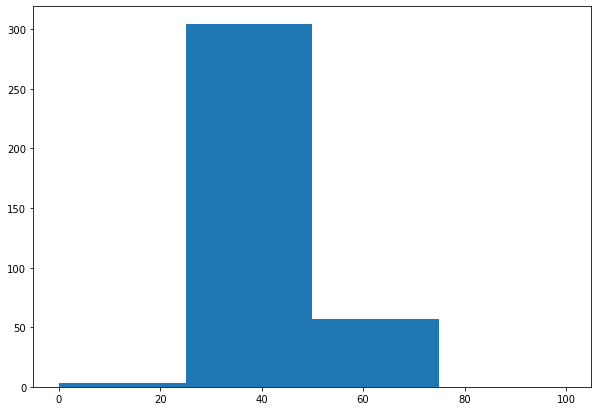

In [9]:
# plot the histogram to verify the IQR and range

fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(df_birth['value'], bins = [0, 25, 50, 75, 100])
plt.show()

In [11]:
# transform the data for outlier detection
birth_ts = TimeSeriesData(df_birth)

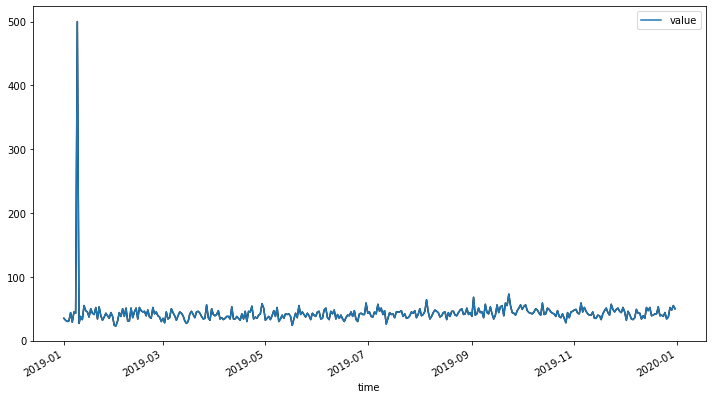

In [12]:
#Plot the timeseries model to check the data points in the dataset
birth_ts.plot(cols=["value"])

In [13]:
#Outlier Detection model for the 'Daily Total Female Birth' dataset
ts_outDetection = OutlierDetector(birth_ts, 'additive')
ts_outDetection.detector()

In [14]:
#outliers
ts_outDetection.outliers[0]

[Timestamp('2019-01-06 00:00:00'),
 Timestamp('2019-01-07 00:00:00'),
 Timestamp('2019-01-08 00:00:00'),
 Timestamp('2019-01-09 00:00:00'),
 Timestamp('2019-01-10 00:00:00'),
 Timestamp('2019-01-11 00:00:00'),
 Timestamp('2019-01-12 00:00:00')]

### Calculate the IQR and Upper/Lower limits manually for verification

In [15]:
resid_q = np.nanpercentile(df_birth['value'], [25, 75])
iqr = resid_q[1] - resid_q[0]

# Here the default iqr multiplier is 3.0 
limits = resid_q + (3 * iqr * np.array([-1, 1]))  
print("Upper limit:", limits[1])
print("Lower limit:", limits[0])

Upper limit: 73.0
Lower limit: 10.0


In [16]:
outliers = df_birth[(df_birth['value'] >= limits[1]) | (df_birth['value'] <= limits[0])]
outliers

,time,value
8,2019-01-09,500
265,2019-09-23,73
